In [1]:
import pandas as pd
import numpy as np

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('train_rmvnan_0207_ver1.csv',low_memory=False)
df.head()

,fullVisitorId,date,visitId,visitNumber,visitStartTime,channelGrouping,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,...,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo_page,trafficSource_adwordsClickInfo_slot,trafficSource_adwordsClickInfo_adNetworkType,trafficSource_adwordsClickInfo_isVideoAd,trafficSource_adContent
0,1131660440785968503,2016-09-02,1472830385,1,2016-09-02 15:33:05,Organic Search,Chrome,Windows,False,desktop,...,google,organic,(not provided),NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,377306020877927890,2016-09-03,1472880147,1,2016-09-03 05:22:27,Organic Search,Firefox,Macintosh,False,desktop,...,google,organic,(not provided),NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,3895546263509774583,2016-09-03,1472865386,1,2016-09-03 01:16:26,Organic Search,Chrome,Windows,False,desktop,...,google,organic,(not provided),NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,4763447161404445595,2016-09-03,1472881213,1,2016-09-03 05:40:13,Organic Search,UC Browser,Linux,False,desktop,...,google,organic,google + online,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,27294437909732085,2016-09-02,1472822600,2,2016-09-02 13:23:20,Organic Search,Chrome,Android,True,mobile,...,google,organic,(not provided),True,NaN,0.0,NaN,NaN,NaN,NaN


In [3]:
# 'visitStartTime' 열을 datetime 형식으로 변환
df['visitStartTime'] = pd.to_datetime(df['visitStartTime'], format='%Y-%m-%d %H:%M:%S')

# 요일과 시간 추출
df['weekday'] = df['visitStartTime'].dt.strftime('%A')
df['hour'] = df['visitStartTime'].dt.hour
df

,fullVisitorId,date,visitId,visitNumber,visitStartTime,channelGrouping,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,...,trafficSource_keyword,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo_page,trafficSource_adwordsClickInfo_slot,trafficSource_adwordsClickInfo_adNetworkType,trafficSource_adwordsClickInfo_isVideoAd,trafficSource_adContent,weekday,hour
0,1131660440785968503,2016-09-02,1472830385,1,2016-09-02 15:33:05,Organic Search,Chrome,Windows,False,desktop,...,(not provided),NaN,NaN,0.0,NaN,NaN,NaN,NaN,Friday,15
1,377306020877927890,2016-09-03,1472880147,1,2016-09-03 05:22:27,Organic Search,Firefox,Macintosh,False,desktop,...,(not provided),NaN,NaN,0.0,NaN,NaN,NaN,NaN,Saturday,5
2,3895546263509774583,2016-09-03,1472865386,1,2016-09-03 01:16:26,Organic Search,Chrome,Windows,False,desktop,...,(not provided),NaN,NaN,0.0,NaN,NaN,NaN,NaN,Saturday,1
3,4763447161404445595,2016-09-03,1472881213,1,2016-09-03 05:40:13,Organic Search,UC Browser,Linux,False,desktop,...,google + online,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Saturday,5
4,27294437909732085,2016-09-02,1472822600,2,2016-09-02 13:23:20,Organic Search,Chrome,Android,True,mobile,...,(not provided),True,NaN,0.0,NaN,NaN,NaN,NaN,Friday,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,5123779100307500332,2017-01-04,1483554750,1,2017-01-04 18:32:30,Social,Chrome,Windows,False,desktop,...,NaN,NaN,/yt/about/,0.0,NaN,NaN,NaN,NaN,Wednesday,18
903649,7231728964973959842,2017-01-04,1483543798,1,2017-01-04 15:29:58,Social,Chrome,Android,True,mobile,...,NaN,NaN,/yt/about/,0.0,NaN,NaN,NaN,NaN,Wednesday,15
903650,5744576632396406899,2017-01-04,1483526434,1,2017-01-04 10:40:34,Social,Android Webview,Android,True,mobile,...,NaN,NaN,/yt/about/ko/,0.0,NaN,NaN,NaN,NaN,Wednesday,10
903651,2709355455991750775,2017-01-05,1483592857,1,2017-01-05 05:07:44,Social,Chrome,Windows,False,desktop,...,NaN,NaN,/l.php,0.0,NaN,NaN,NaN,NaN,Thursday,5


In [4]:
# 요일별 및 시간대별 사용자 수 계산
user_counts = df.groupby(['weekday', 'hour'])['visitId'].nunique().reset_index(name='user_count_by_weekday_hour')

# 결과 출력
print('요일별 및 시간대별 사용자 수:')
print(user_counts)

요일별 및 시간대별 사용자 수:
       weekday  hour  user_count_by_weekday_hour
0       Friday     0                        5136
1       Friday     1                        4997
2       Friday     2                        4898
3       Friday     3                        4665
4       Friday     4                        4408
..         ...   ...                         ...
163  Wednesday    19                        7915
164  Wednesday    20                        7490
165  Wednesday    21                        7070
166  Wednesday    22                        6255
167  Wednesday    23                        5717

[168 rows x 3 columns]


In [6]:
# 요일별 사용자 수 계산
weekday_user_counts = df.groupby('weekday')['visitId'].nunique().reset_index(name='user_count_by_weekday')

# 시간대별 사용자 수 계산
hourly_user_counts = df.groupby('hour')['visitId'].nunique().reset_index(name='user_count_by_hour')

df

,fullVisitorId,date,visitId,visitNumber,visitStartTime,channelGrouping,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,...,trafficSource_keyword,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo_page,trafficSource_adwordsClickInfo_slot,trafficSource_adwordsClickInfo_adNetworkType,trafficSource_adwordsClickInfo_isVideoAd,trafficSource_adContent,weekday,hour
0,1131660440785968503,2016-09-02,1472830385,1,2016-09-02 15:33:05,Organic Search,Chrome,Windows,False,desktop,...,(not provided),NaN,NaN,0.0,NaN,NaN,NaN,NaN,Friday,15
1,377306020877927890,2016-09-03,1472880147,1,2016-09-03 05:22:27,Organic Search,Firefox,Macintosh,False,desktop,...,(not provided),NaN,NaN,0.0,NaN,NaN,NaN,NaN,Saturday,5
2,3895546263509774583,2016-09-03,1472865386,1,2016-09-03 01:16:26,Organic Search,Chrome,Windows,False,desktop,...,(not provided),NaN,NaN,0.0,NaN,NaN,NaN,NaN,Saturday,1
3,4763447161404445595,2016-09-03,1472881213,1,2016-09-03 05:40:13,Organic Search,UC Browser,Linux,False,desktop,...,google + online,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Saturday,5
4,27294437909732085,2016-09-02,1472822600,2,2016-09-02 13:23:20,Organic Search,Chrome,Android,True,mobile,...,(not provided),True,NaN,0.0,NaN,NaN,NaN,NaN,Friday,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,5123779100307500332,2017-01-04,1483554750,1,2017-01-04 18:32:30,Social,Chrome,Windows,False,desktop,...,NaN,NaN,/yt/about/,0.0,NaN,NaN,NaN,NaN,Wednesday,18
903649,7231728964973959842,2017-01-04,1483543798,1,2017-01-04 15:29:58,Social,Chrome,Android,True,mobile,...,NaN,NaN,/yt/about/,0.0,NaN,NaN,NaN,NaN,Wednesday,15
903650,5744576632396406899,2017-01-04,1483526434,1,2017-01-04 10:40:34,Social,Android Webview,Android,True,mobile,...,NaN,NaN,/yt/about/ko/,0.0,NaN,NaN,NaN,NaN,Wednesday,10
903651,2709355455991750775,2017-01-05,1483592857,1,2017-01-05 05:07:44,Social,Chrome,Windows,False,desktop,...,NaN,NaN,/l.php,0.0,NaN,NaN,NaN,NaN,Thursday,5


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

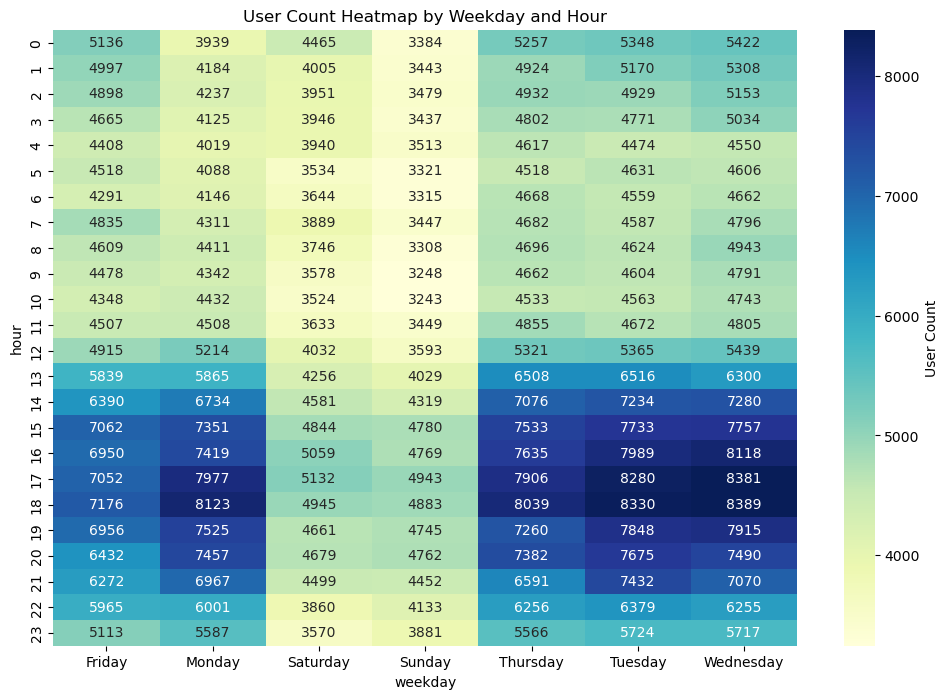

In [8]:
# 데이터프레임을 피벗하여 히트맵에 사용할 수 있는 형태로 변환
heatmap_data = user_counts.pivot(index='hour', columns='weekday', values='user_count_by_weekday_hour')

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(data=heatmap_data, annot=True, fmt="d", cmap='YlGnBu', cbar_kws={'label': 'User Count'})
plt.title('User Count Heatmap by Weekday and Hour')
plt.show()

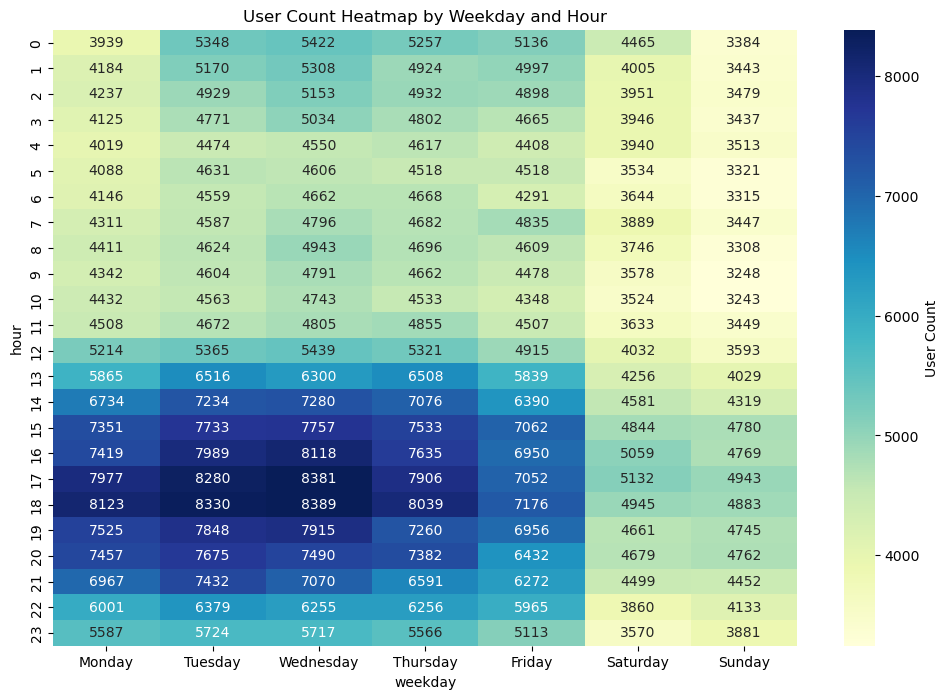

In [11]:
# 요일 순서를 원하는 순서로 직접 지정
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
user_counts['weekday'] = pd.Categorical(user_counts['weekday'], categories=weekday_order, ordered=True)

# 데이터프레임을 피벗하여 히트맵에 사용할 수 있는 형태로 변환
heatmap_data = user_counts.pivot(index='hour', columns='weekday', values='user_count_by_weekday_hour')

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(data=heatmap_data, annot=True, fmt="d", cmap='YlGnBu', cbar_kws={'label': 'User Count'})
plt.title('User Count Heatmap by Weekday and Hour')
plt.show()

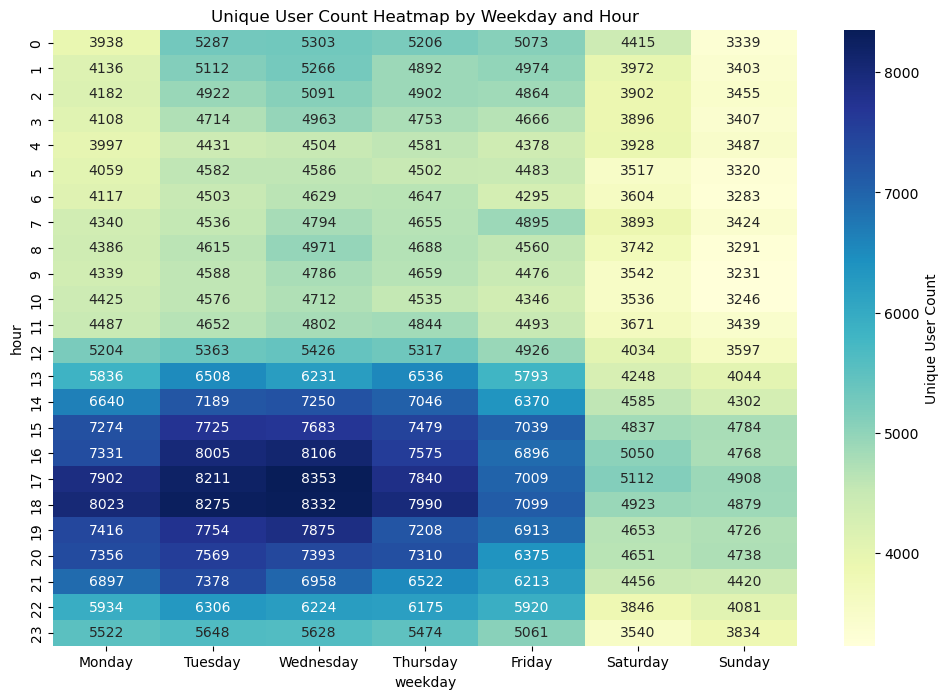

In [14]:
# 'userId'의 고유한 값의 개수를 계산
user_counts = df.groupby(['weekday', 'hour'])['fullVisitorId'].nunique().reset_index(name='unique_user_count_by_weekday_hour')

# 요일 순서를 원하는 순서로 직접 지정
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
user_counts['weekday'] = pd.Categorical(user_counts['weekday'], categories=weekday_order, ordered=True)

# 데이터프레임을 피벗하여 히트맵에 사용할 수 있는 형태로 변환
heatmap_data = user_counts.pivot(index='hour', columns='weekday', values='unique_user_count_by_weekday_hour')

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(data=heatmap_data, annot=True, fmt="d", cmap='YlGnBu', cbar_kws={'label': 'Unique User Count'})
plt.title('Unique User Count Heatmap by Weekday and Hour')
plt.show()
